> 문제 4) iris 종 분류

In [83]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.metrics import accuracy_score, precision_score,recall_score,f1_score,roc_auc_score, r2_score, mean_squared_error

In [84]:
from sklearn.datasets import load_iris
iris = load_iris()
x = pd.DataFrame(iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
y = iris.target
# 이진 분류로 변경 (setosa = 0 , 나머지 =1)

y= np.where(y>0,1,0)

In [85]:
# 데이터 탐색 
print(x.head())


   sepal_length  sepal_width  petal_length  petal_width
0           5.1          3.5           1.4          0.2
1           4.9          3.0           1.4          0.2
2           4.7          3.2           1.3          0.2
3           4.6          3.1           1.5          0.2
4           5.0          3.6           1.4          0.2


In [86]:
# 원핫 인코딩 필요 없는 모두 float 형 데이터 
print(x.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
dtypes: float64(4)
memory usage: 4.8 KB
None


In [87]:
print(x.describe().T)

              count      mean       std  min  25%   50%  75%  max
sepal_length  150.0  5.843333  0.828066  4.3  5.1  5.80  6.4  7.9
sepal_width   150.0  3.057333  0.435866  2.0  2.8  3.00  3.3  4.4
petal_length  150.0  3.758000  1.765298  1.0  1.6  4.35  5.1  6.9
petal_width   150.0  1.199333  0.762238  0.1  0.3  1.30  1.8  2.5


In [88]:
x_train, x_test, y_train,y_test = train_test_split(x,y,test_size=0.2)

In [89]:
y_train = pd.DataFrame(y_train)
y_train.columns=['species']
y_test = pd.DataFrame(y_test)


In [90]:
# 결측치 삽입 (아래에서 처리 연습 위해)
x_test['sepal_length'].iloc[0] = None
x_train['sepal_width'].iloc[1] = None 

# 이상치 삽입 (아래에서 처리 연습 위해)
x_train['sepal_width'].iloc[0] = 150

In [91]:
print(x_test.isnull().sum())
print('---------')
print(x_train.isnull().sum())

sepal_length    1
sepal_width     0
petal_length    0
petal_width     0
dtype: int64
---------
sepal_length    0
sepal_width     1
petal_length    0
petal_width     0
dtype: int64


In [92]:
x_test.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,29.0,5.831034,0.641485,4.6,5.400,6.00,6.300,7.2
sepal_width,30.0,3.096667,0.458997,2.2,2.800,3.10,3.400,4.0
petal_length,30.0,3.816667,1.682790,1.2,1.525,4.50,5.075,6.1
petal_width,30.0,1.263333,0.765409,0.1,0.400,1.45,1.750,2.5


In [93]:
# 이상치 확인 
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal_length,120.0,5.839167,0.869202,4.3,5.1,5.7,6.425,7.9
sepal_width,119.0,4.279832,13.478291,2.0,2.8,3.0,3.300,150.0
petal_length,120.0,3.743333,1.791846,1.0,1.6,4.2,5.100,6.9
petal_width,120.0,1.183333,0.763818,0.1,0.3,1.3,1.800,2.5


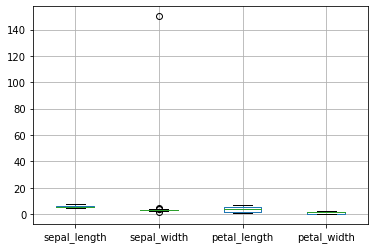

In [94]:
# 이상치 확인 
import matplotlib.pyplot as plt 
boxplot = x_train.boxplot()

In [95]:
# 결측치 대체 or 제거 
# x_train, x_test 모두 결측치 존재

# 결측치 제거하기  
# x_train.dropna(axis=0,inplace=True)
# x_train.dropna(axis=0,inplace=True)


# 중앙값으로 결측치 대체하기 
x_train['sepal_width'] = x_train['sepal_width'].fillna(x_train['sepal_width'].median())
x_test['sepal_length'] = x_test['sepal_length'].fillna(x_test['sepal_length'].median())


print(x_train.isnull().sum())
print(x_test.isnull().sum())


sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64
sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
dtype: int64


In [96]:
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
52,6.9,150.0,4.9,1.5
124,6.7,3.0,5.7,2.1
23,5.1,3.3,1.7,0.5
105,7.6,3.0,6.6,2.1
69,5.6,2.5,3.9,1.1


In [97]:
# 이상치 제거 
# q1 = x_train['sepal_width'].quantile(0.25)
# q3 = x_train['sepal_width'].quantile(0.75)
# iqr = abs(q1-q3)
# lower = q1-1.5*iqr
# upper = q3+1.5*iqr


# x_train = x_train[(x_train['sepal_width']>=lower)&(x_train['sepal_width']<=upper)]
# x_train.head()


In [98]:
# 이상치 대체 
cond1 = (x_train['sepal_width']<=10)
max_sw = x_train[cond1]['sepal_width'].max()

x_train['sepal_width'] = np.where(cond1,x_train['sepal_width'],max_sw)
x_train.head()

,sepal_length,sepal_width,petal_length,petal_width
52,6.9,4.4,4.9,1.5
124,6.7,3.0,5.7,2.1
23,5.1,3.3,1.7,0.5
105,7.6,3.0,6.6,2.1
69,5.6,2.5,3.9,1.1


In [100]:
x_train,x_val,y_train,y_val = train_test_split(x_train,y_train['species'],test_size=0.2,stratify=y_train['species'])


In [102]:
model = RandomForestClassifier()
model.fit(x_train,y_train)
y_pred = model.predict(x_val)
accuracy = accuracy_score(y_val,y_pred)
f1_score = f1_score(y_val,y_pred,average='macro')
print(accuracy)
print(f1_score)

1.0
1.0


In [110]:
y_result = model.predict(x_test)
y_prob = model.predict_proba(x_test)


result = pd.DataFrame({'result':y_result,'prob_0':y_prob[:,0]})
result


,result,prob_0
0,1,0.00
1,1,0.00
2,1,0.00
3,1,0.00
4,1,0.00
5,0,1.00
6,1,0.00
7,1,0.00
8,0,1.00
9,1,0.00


In [ ]:
# result.to_csv('result.csv',index=False)